In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 #Primero, cargamos el Excel
internet = pd.read_excel('./Internet.xlsx', sheet_name=None)

In [3]:
#Luego, selecciono las hojas a utilizar en el KPI propuesto
penetracion_poblacion = internet['Penetración-poblacion']
penetracion_totales = internet['Penetracion-totales']

In [4]:
#Agrego la columna de Accesos por cada 100 hogares al DF a utilizar, ya que este no contaba con dicha columna, y elimino la que no voy a utilizar.
penetracion_poblacion['Accesos por cada 100 hogares'] = penetracion_totales['Accesos por cada 100 hogares']
penetracion_poblacion = penetracion_poblacion.drop('Accesos por cada 100 hab', axis=1)

In [5]:
#Reviso si se realizó correctamente
penetracion_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2023,4,Buenos Aires,78.56
1,2023,4,Capital Federal,77.84
2,2023,4,Catamarca,77.02
3,2023,4,Chaco,77.20
4,2023,4,Chubut,77.21


In [6]:
#Filtro los datos por trimestre
trimestre_actual = penetracion_poblacion[(penetracion_poblacion['Trimestre'] == 3) ]
proximo_trimestre = penetracion_poblacion[(penetracion_poblacion['Trimestre'] == 4)]

In [7]:
#Renombro las columnas, para mayor claridad
trimestre_actual = trimestre_actual.rename(columns={'Accesos por cada 100 hogares': 'Acceso Actual'})
proximo_trimestre = proximo_trimestre.rename(columns={'Accesos por cada 100 hogares': 'Nuevo Acceso'})

In [8]:
#Junto los datos de ambos trimestres en un DF
kpi_data = pd.merge(trimestre_actual[['Provincia', 'Acceso Actual']], 
                    proximo_trimestre[['Provincia', 'Nuevo Acceso']], 
                    on='Provincia')

In [9]:
#Realizo el cálculo del KPI
kpi_data['KPI'] = ((kpi_data['Nuevo Acceso'] - kpi_data['Acceso Actual']) / kpi_data['Acceso Actual']) * 100

In [10]:
kpi_data.to_excel('kpi_data.xlsx', index=False) #Guardo el DF en un Excel para luego llevarlo a PowerBI

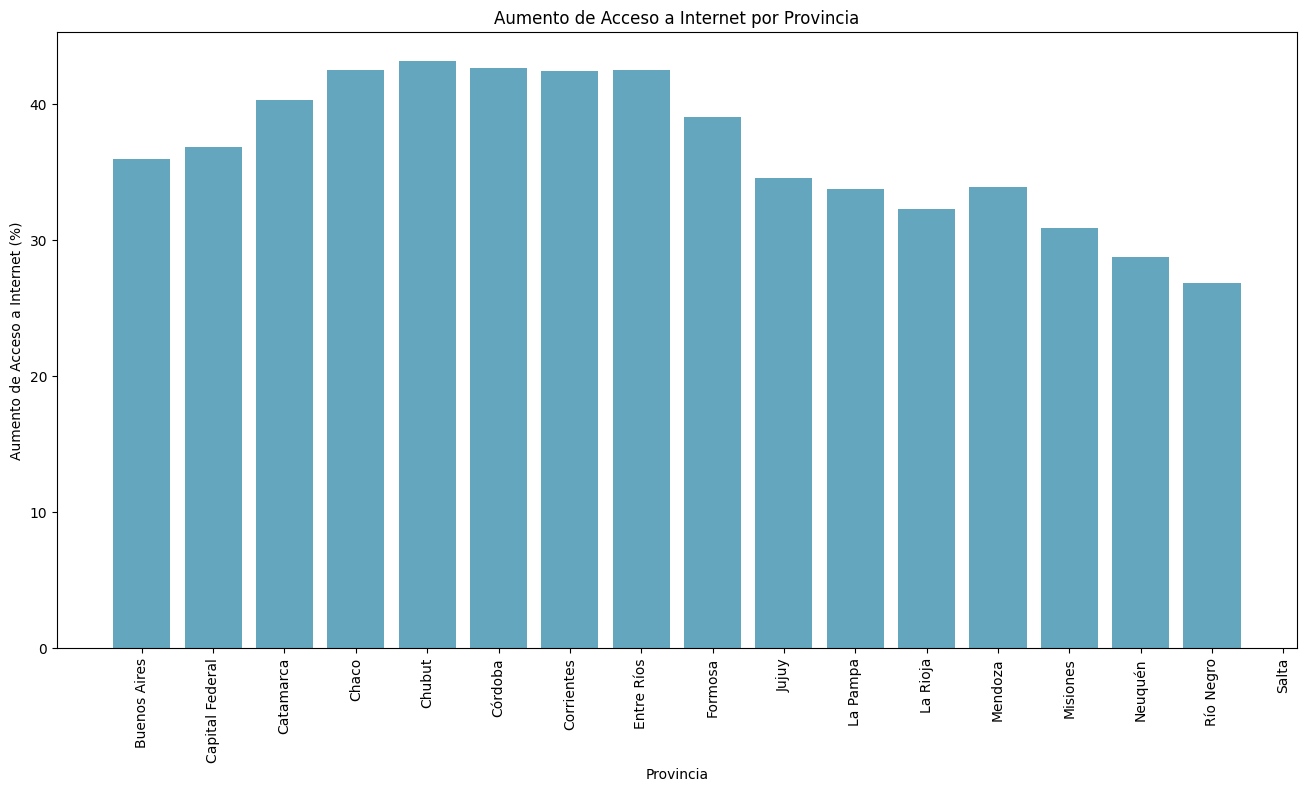

In [11]:
#Grafico el KPI
plt.figure(figsize=(16, 8))
plt.bar(kpi_data['Provincia'], kpi_data['KPI'], color='#64a6bd')
plt.xlabel('Provincia')
plt.ylabel('Aumento de Acceso a Internet (%)')
plt.title('Aumento de Acceso a Internet por Provincia')
plt.xticks(rotation=90)
plt.show()

Los siguientes KPIs que elegí, fueron:
1. Crecimiento de Usuarios con Fibra Óptica

- Objetivo: Aumentar en un 10% la cantidad de usuarios con tecnología de fibra óptica para el próximo año.

- Fórmula: (Usuarios con fibra óptica año actual - usuarios con fibra óptica año anterior / usuarios fibra óptica año anterior) * 100

2. Crecimiento de usuarios con 1000 Mbps

- Objetivo: Aumentar en un 10% la cantidad de usuarios velocidad de 1000 Mbps para el próximo año.

- Fórmula: (Usuarios con 1000 Mbps actual - usuarios con 1000 Mbps año anterior / usuarios 1000 Mbps año anterior) * 100